In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
fair_probs = torch.ones([6]) / 6

fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [20]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [22]:
multinomial.Multinomial(10, fair_probs).sample()


tensor([1., 2., 1., 0., 5., 1.])

In [40]:
times = 1000
counts = multinomial.Multinomial(times, fair_probs).sample()
counts

tensor([179., 169., 143., 166., 158., 185.])

In [41]:
counts / times

tensor([0.1790, 0.1690, 0.1430, 0.1660, 0.1580, 0.1850])

In [43]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
counts

tensor([[3., 1., 1., 1., 3., 1.],
        [1., 2., 3., 0., 2., 2.],
        [0., 1., 0., 5., 4., 0.],
        ...,
        [2., 2., 2., 0., 3., 1.],
        [0., 5., 2., 0., 1., 2.],
        [0., 1., 2., 0., 5., 2.]])

In [46]:
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[  3.,   1.,   1.,   1.,   3.,   1.],
        [  4.,   3.,   4.,   1.,   5.,   3.],
        [  4.,   4.,   4.,   6.,   9.,   3.],
        ...,
        [864., 795., 780., 815., 863., 863.],
        [864., 800., 782., 815., 864., 865.],
        [864., 801., 784., 815., 869., 867.]])

In [48]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates

tensor([[0.3000, 0.1000, 0.1000, 0.1000, 0.3000, 0.1000],
        [0.2000, 0.1500, 0.2000, 0.0500, 0.2500, 0.1500],
        [0.1333, 0.1333, 0.1333, 0.2000, 0.3000, 0.1000],
        ...,
        [0.1735, 0.1596, 0.1566, 0.1637, 0.1733, 0.1733],
        [0.1731, 0.1603, 0.1567, 0.1633, 0.1731, 0.1733],
        [0.1728, 0.1602, 0.1568, 0.1630, 0.1738, 0.1734]])

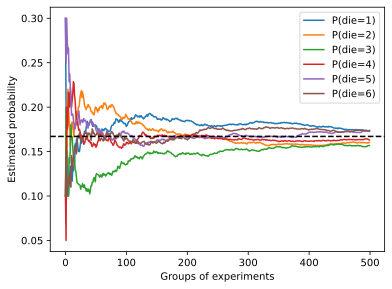

In [61]:
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();
